In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Copy the data from website to .txt and read

![](docs/ColombiaData.png)

In [116]:
file_path = "test.txt"
df = pd.read_csv(file_path, sep="\t")

In [117]:
df.head()

,Fecha,Densidades,Hombres,Mujeres,Población
0,2021,45,25.171.408,26.094.433,51.049.000
1,2020,44,24.984.564,25.898.320,50.372.000
2,2019,43,24.713.193,25.626.250,49.396.000
3,2018,42,24.370.780,25.290.276,48.258.000
4,2017,42,23.990.081,24.919.763,47.419.000


### Convert to efficient compression format

In [118]:
df.to_pickle("test.pkl", compression="gzip")

### Read the data

In [119]:
df = pd.read_pickle("test.pkl", compression="gzip")

In [120]:
# replace . from hombres number
df["Hombres"] = df["Hombres"].str.replace(".", "").astype(int)
df["Mujeres"] = df["Mujeres"].str.replace(".", "").astype(int)
df["Población"] = df["Población"].str.replace(".", "").astype(int)

/var/folders/xd/jh3d4d1d1rd5jck45lvbs1900000gp/T/ipykernel_3460/1448408230.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Hombres"] = df["Hombres"].str.replace(".", "").astype(int)
/var/folders/xd/jh3d4d1d1rd5jck45lvbs1900000gp/T/ipykernel_3460/1448408230.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Mujeres"] = df["Mujeres"].str.replace(".", "").astype(int)
/var/folders/xd/jh3d4d1d1rd5jck45lvbs1900000gp/T/ipykernel_3460/1448408230.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Población"] = d

In [121]:
df.head()

,Fecha,Densidades,Hombres,Mujeres,Población
0,2021,45,25171408,26094433,51049000
1,2020,44,24984564,25898320,50372000
2,2019,43,24713193,25626250,49396000
3,2018,42,24370780,25290276,48258000
4,2017,42,23990081,24919763,47419000


### see data

<Axes: title={'center': 'Población de Colombia'}, xlabel='Año', ylabel='Población'>

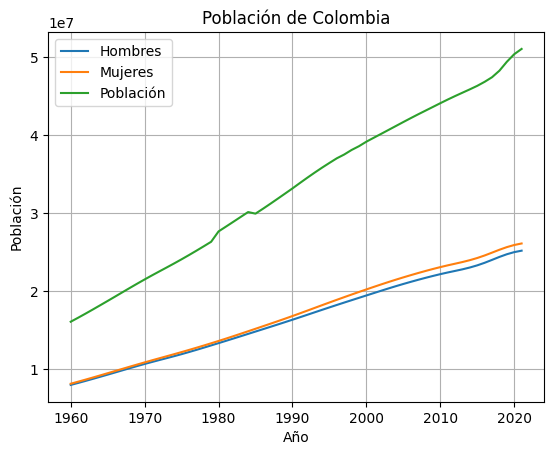

In [122]:

df.plot(
    x = "Fecha", 
    y = ["Hombres", "Mujeres", "Población"], 
    grid = True,
    title = "Población de Colombia",
    backend="matplotlib",
    xlabel="Año",
    ylabel="Población",
)

In [123]:
new_dates = np.arange(2021, 2046)

In [124]:
hombres = df["Hombres"].to_numpy()
mujeres = df["Mujeres"].to_numpy()
poblacion = df["Población"].to_numpy()
years = df["Fecha"].to_numpy()

## Lineal growth method

Explain: 

Assume that population growth is going to be data by a linear rate
![](https://ccp.ucr.ac.cr/cursos/demografia_03/Imagenes/quinta4.gif)

where r is the slope

$$ r = \frac{P_{last} - P_{init}}{t_{last}-t_{init} }$$


> Note that r is the growth speed factor.

In [125]:
r_hombres_lineal = (hombres[-1] - hombres[0] ) / ( years[-1] - years[0])
r_mujeres_lineal = (mujeres[-1] - mujeres[0] ) / ( years[-1] - years[0])
r_lineal_lineal = (poblacion[-1] - poblacion[0] ) / ( years[-1] - years[0])

In [126]:
new_hombres = hombres[0] + (r_hombres_lineal) * (new_dates - years[0]) 
new_mujeres = mujeres[0] + (r_mujeres_lineal) * (new_dates - years[0])
new_poblacion = poblacion[0] + (r_lineal_lineal) * (new_dates - years[0])

## Geometric gradient - exponencial method

Explain:


![](https://ccp.ucr.ac.cr/cursos/demografia_03/Imagenes/quinta12.gif)

Asume that

$$ P_{future} = P_{initial} * (1 + r )^k$$

> where r is the slope and k is the difference between final and initial period

In [128]:
r_hombres_exponencial = np.exp(np.log(hombres[-1] / hombres[0]) / (years[-1] - years[0]))
r_mujeres_exponencial = np.exp(np.log(mujeres[-1] / mujeres[0]) / (years[-1] - years[0]))
r_lineal_exponencial = np.exp(np.log(poblacion[-1] / poblacion[0]) / (years[-1] - years[0]))

In [ ]:
new_hombres_exponencial = hombres[0] * (r_hombres_exponencial ** (new_dates - years[0]))
new_mujeres_exponencial = mujeres[0] * (r_mujeres_exponencial ** (new_dates - years[0]))


np.polyfit(df["Fecha"], hombres, 1)
np.polyval(r_hombres_lineal, new_dates)

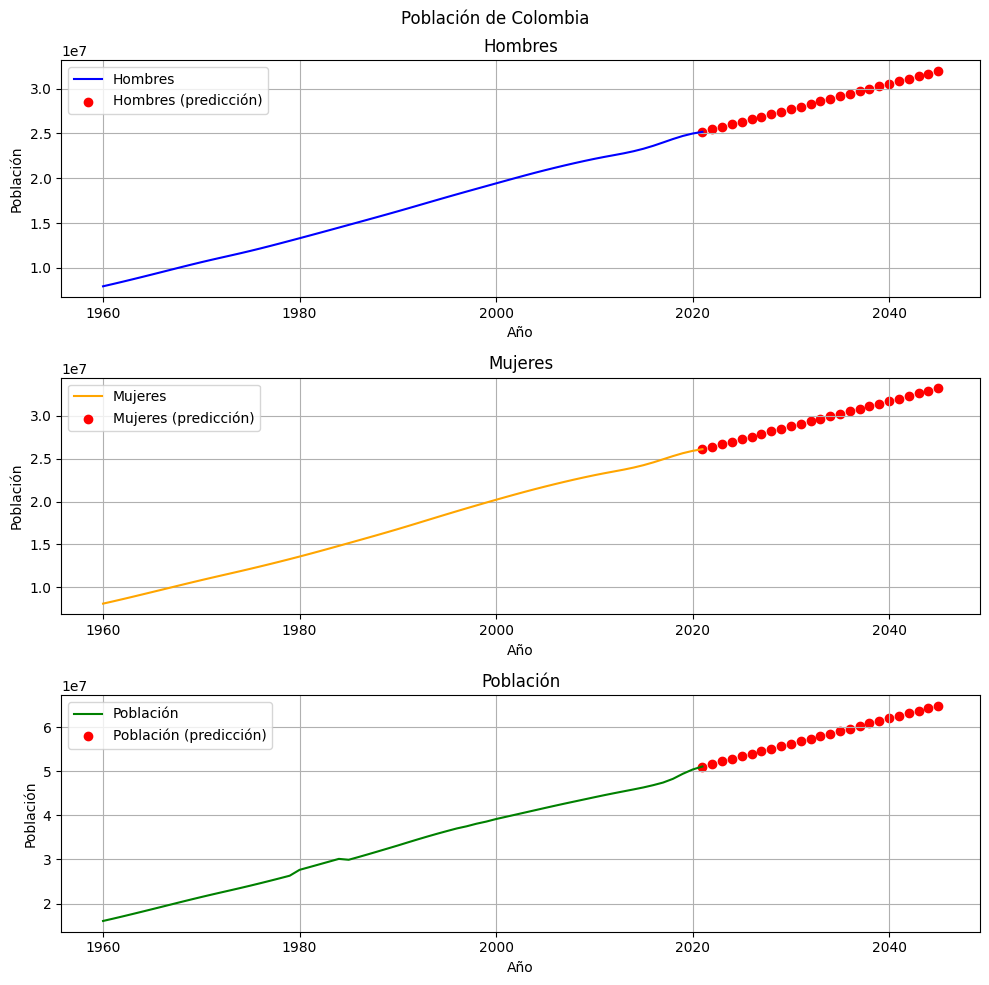

In [127]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

fig.suptitle("Población de Colombia")
ax[0].plot(years, hombres, label="Hombres", color="blue")
ax[0].scatter(new_dates, new_hombres, label="Hombres (predicción)", color="red")
ax[0].set_title("Hombres")
ax[0].set_xlabel("Año")
ax[0].set_ylabel("Población")
ax[0].grid(True)
ax[0].legend()

ax[1].plot(years, mujeres, label="Mujeres", color = "orange")
ax[1].scatter(new_dates, new_mujeres, label="Mujeres (predicción)", color = "red")
ax[1].set_title("Mujeres")
ax[1].set_xlabel("Año")
ax[1].set_ylabel("Población")
ax[1].grid(True)
ax[1].legend()

ax[2].plot(years, poblacion, label="Población", color="green")
ax[2].scatter(new_dates, new_poblacion, label="Población (predicción)", color="red")
ax[2].set_title("Población")
ax[2].set_xlabel("Año")
ax[2].set_ylabel("Población")
ax[2].grid(True)
ax[2].legend()

fig.tight_layout()
plt.show()
